# Task_1:Prediction using supervised model
### BY: Prateek Dey

In [29]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  

In [5]:
# Reading the CSV file
df=pd.read_csv('http://bit.ly/w-data')    
df.head(8)                                #Displaying the first 8 columns of the dataframe

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


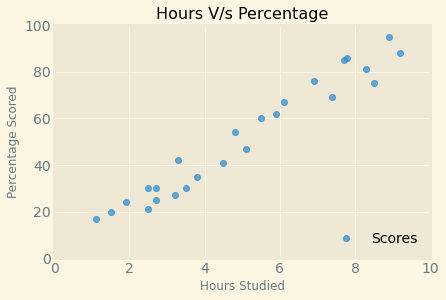

In [63]:
#Plotting the data using matplotlib

df.plot(x='Hours',y='Scores',style='o',alpha=0.7)
plt.xlabel('Hours Studied')                   # Naming the x-axis
plt.ylabel('Percentage Scored')               # Naming the y-axis
plt.title('Hours V/s Percentage')              # Giving title to the plot
plt.legend(loc=4,frameon=False)               # Changing the position  and frame of the legend 
rng=plt.gca()
rng.axis([0,10,0,100])                        # Assigning X and Y range
plt.style.use('Solarize_Light2')              # Choosing the plot style to be Solarize_Light2

### It can be seen there exist a positive linear relationship between number of hours studied and percentage scored by the student. For further varification I'll use linear regression.

In [41]:
# Selecting X(input values) column and y(output value/label) column from our Dataframe
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [42]:
# Creating the training and testing sets for prepearing our test object using the train_test_split function

X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0) # Assigened random state to be 0 to avoid any 
                                                                    #variation in the result in case we have to run
                                                                    # the program multiple times

In [59]:
# Training the algorithm
from sklearn.linear_model import LinearRegression
Linreg=LinearRegression()                                     # Created the test object
Linreg.fit(X_train,y_train)                                   # Training the object
print('Training Done')

Training Done


Liner Regression plot


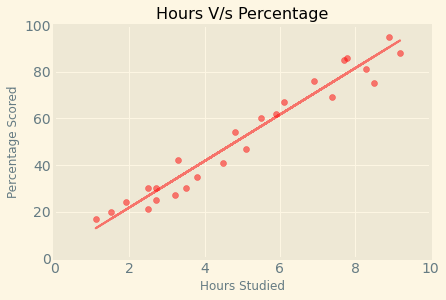

In [64]:
# Plotting the linear regression model
plt.scatter(X,y,color='red',alpha=0.5)
plt.plot(X,Linreg.coef_*X+Linreg.intercept_,color='red',alpha=0.5)
plt.xlabel('Hours Studied')                   # Naming the x-axis
plt.ylabel('Percentage Scored')               # Naming the y-axis
plt.title('Hours V/s Percentage')              # Giving title to the plot                
rng=plt.gca()
rng.axis([0,10,0,100])
print('Liner Regression plot')

## Checking the accuracy of the predictor

In [62]:
# Before we start predicting the values we must check how well can the predictor we have developed works
print('The LinearRegression predictor has:',Linreg.score(X_test,y_test)*100,'% accuracy')

The LinearRegression predictor has: 93.67661043365057 % accuracy


#### The predictor has 93.67 % accuracy therefore values predicted will be reliable

In [68]:
# Comparing the values of y_test using our predictor v/s  the actual values
y_pred=Linreg.predict(X_test)
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [82]:
# Predicting the percentage of a student when he/she studies 9.25 hrs/day
time = np.array(9.25).reshape(-1,1)
result = Linreg.predict(hours)
print("No of Hours = {}".format(time))
print("Predicted Score = {}".format(result[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341652


## Evaluating the model
#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [83]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502482
